# 📊 Item (b): Redução por Polos Dominantes

## 🚢 Veículo Submersível Não-Tripulado

### 📋 Descrição do Problema

Considere um veículo submersível não-tripulado cuja planta que relaciona o ângulo do leme de profundidade, ψ, e o ângulo de arfagem, θ, tenha Função Transferência (FT) da forma:

$$\hat{\theta}(s) / \hat{\psi}(s) = \hat{g}(s) = -\frac{0,25s + 0,10875}{s^4 + 3,456s^3 + 3,45688s^2 + 0,719297s + 0,041574}$$

### 🎯 Objetivo do Exercício (b)

**Proceda a uma redução do modelo à segunda ordem pelo método dos polos dominantes, se possível**

Simplificar a função de transferência original de quarta ordem para uma de segunda ordem que ainda represente adequadamente o comportamento do sistema.

### 📝 Metodologia

1. **Análise dos Polos**: Identificação de todos os polos do sistema original
2. **Determinação dos Polos Dominantes**: Identificação dos polos mais próximos ao eixo imaginário
3. **Verificação da Condição de Dominância**: Verificar se a razão entre partes reais é ≥ 5-10
4. **Construção do Modelo Reduzido**: Criar sistema de 2ª ordem com polos dominantes
5. **Ajuste do Ganho**: Manter o ganho DC igual ao sistema original
6. **Validação**: Comparar respostas dos sistemas original e reduzido

## 🔧 1. Configuração e Importações

Importação das bibliotecas necessárias para análise de sistemas de controle e redução de modelos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

# Tratamento de importações opcionais
try:
    from control import tf, step_response
    control_available = True
    print("Biblioteca 'control' disponível")
except ImportError:
    control_available = False
    print("Biblioteca 'control' não disponível - usando apenas scipy")

# Verificar se sympy está disponível
try:
    import sympy as sp
    from sympy import symbols, latex, Rational, I, simplify, apart, expand
    from IPython.display import display, Latex, Math
    sympy_available = True
    print("Biblioteca 'sympy' disponível para renderização LaTeX")
except ImportError:
    sympy_available = False
    print("Biblioteca 'sympy' não disponível")

Biblioteca 'control' não disponível - usando apenas scipy
Biblioteca 'sympy' disponível para renderização LaTeX
Biblioteca 'sympy' disponível para renderização LaTeX


## ⚙️ 2. Definições de Funções Auxiliares

Funções para análise de sistemas e redução por polos dominantes.

In [2]:
def calcular_ganho_dc(sistema):
    """
    Calcula o ganho DC de um sistema LTI usando scipy.

    Args:
        sistema (scipy.signal.lti): Sistema LTI
    
    Returns:
        float: Ganho DC do sistema
    """
    ganho_dc = sistema.num[-1] / sistema.den[-1]
    return ganho_dc

def definir_sistema_original():
    """
    Define o sistema original com os coeficientes dados.

    Returns:
        scipy.signal.lti: Sistema LTI definido
    """
    # Coeficientes do numerador e denominador
    numerador = [-0.25, -0.10875]
    denominador = [1, 3.456, 3.45688, 0.719297, 0.041574]
    
    # Criação do sistema LTI
    sistema = lti(numerador, denominador)
    return sistema

def analisar_polos_para_dominancia(sistema):
    """
    Analisa os polos do sistema e identifica os dominantes.
    
    Args:
        sistema (scipy.signal.lti): Sistema LTI
    
    Returns:
        tuple: (polos, polos_dominantes, razoes_dominancia, eh_dominante)
    """
    polos = sistema.poles
    
    print("🔍 ANÁLISE DE POLOS PARA DOMINÂNCIA")
    print("=" * 60)
    print(f"Número de polos: {len(polos)}")
    print("\nPolos do sistema:")
    
    # Exibir todos os polos
    for i, polo in enumerate(polos, 1):
        parte_real = np.real(polo)
        parte_imag = np.imag(polo)
        if np.isreal(polo):
            print(f"  p_{i} = {parte_real:.6f}")
        else:
            print(f"  p_{i} = {parte_real:.6f} {'+' if parte_imag >= 0 else ''}{parte_imag:.6f}j")
    
    # Encontrar partes reais (em magnitude)
    partes_reais = np.abs(np.real(polos))
    
    # Ordenar polos por parte real (magnitude crescente)
    indices_ordenados = np.argsort(partes_reais)
    polos_ordenados = polos[indices_ordenados]
    partes_reais_ordenadas = partes_reais[indices_ordenados]
    
    print(f"\nPolos ordenados por parte real (magnitude):")
    for i, (polo, parte_real) in enumerate(zip(polos_ordenados, partes_reais_ordenadas)):
        print(f"  Polo {i+1}: {polo:.6f}, |Re| = {parte_real:.6f}")
    
    # Identificar polos dominantes (menores partes reais)
    # Assumindo que queremos reduzir para 2ª ordem, pegamos os 2 polos mais lentos
    polos_dominantes = polos_ordenados[:2]
    polos_nao_dominantes = polos_ordenados[2:]
    
    print(f"\n📌 IDENTIFICAÇÃO DOS POLOS DOMINANTES:")
    print(f"Polos candidatos a dominantes: {polos_dominantes}")
    print(f"Polos não-dominantes: {polos_nao_dominantes}")
    
    # Verificar condição de dominância
    razoes_dominancia = []
    if len(polos_nao_dominantes) > 0:
        parte_real_dominante = np.max(np.abs(np.real(polos_dominantes)))
        
        print(f"\n🔍 VERIFICAÇÃO DA CONDIÇÃO DE DOMINÂNCIA:")
        print(f"Maior parte real dos polos dominantes: {parte_real_dominante:.6f}")
        
        for i, polo_nd in enumerate(polos_nao_dominantes):
            parte_real_nd = np.abs(np.real(polo_nd))
            razao = parte_real_nd / parte_real_dominante
            razoes_dominancia.append(razao)
            
            print(f"Polo não-dominante {i+1}: |Re| = {parte_real_nd:.6f}")
            print(f"Razão = {parte_real_nd:.6f} / {parte_real_dominante:.6f} = {razao:.2f}")
            
            if razao >= 5:
                print(f"  ✅ Condição satisfeita (razão ≥ 5)")
            else:
                print(f"  ❌ Condição NÃO satisfeita (razão < 5)")
    
    # Determinar se redução é possível
    eh_dominante = all(razao >= 5 for razao in razoes_dominancia) if razoes_dominancia else False
    
    print(f"\n🎯 CONCLUSÃO:")
    if eh_dominante:
        print("✅ A redução por polos dominantes é POSSÍVEL")
        print("   Todos os polos não-dominantes são pelo menos 5x mais rápidos")
    else:
        print("❌ A redução por polos dominantes NÃO é recomendada")
        print("   Alguns polos não-dominantes não são suficientemente mais rápidos")
    
    return polos, polos_dominantes, razoes_dominancia, eh_dominante

In [3]:
def criar_sistema_reduzido(polos_dominantes, ganho_dc_original):
    """
    Cria o sistema reduzido de 2ª ordem usando os polos dominantes.
    
    Args:
        polos_dominantes (array): Polos dominantes do sistema original
        ganho_dc_original (float): Ganho DC do sistema original
    
    Returns:
        scipy.signal.lti: Sistema reduzido de 2ª ordem
    """
    print("🏗️ CONSTRUÇÃO DO SISTEMA REDUZIDO")
    print("=" * 60)
    
    # Verificar se temos exatamente 2 polos
    if len(polos_dominantes) != 2:
        raise ValueError(f"Esperado 2 polos dominantes, recebido {len(polos_dominantes)}")
    
    p1, p2 = polos_dominantes
    print(f"Polos dominantes:")
    print(f"  p1 = {p1:.6f}")
    print(f"  p2 = {p2:.6f}")
    
    # Construir o denominador de 2ª ordem
    # (s - p1)(s - p2) = s² - (p1 + p2)s + p1*p2
    soma_polos = p1 + p2
    produto_polos = p1 * p2
    
    denominador_reduzido = [1, -soma_polos, produto_polos]
    
    print(f"\nDenominador do sistema reduzido:")
    print(f"  s² + ({-soma_polos:.6f})s + ({produto_polos:.6f})")
    print(f"  = s² {'+' if -soma_polos >= 0 else ''}{-soma_polos:.6f}s {'+' if produto_polos >= 0 else ''}{produto_polos:.6f}")
    
    # Determinar o numerador para manter o ganho DC
    # G_red(0) = numerador[0] / denominador[0] = ganho_dc_original
    # numerador[0] = ganho_dc_original * produto_polos
    numerador_constante = ganho_dc_original * produto_polos
    numerador_reduzido = [numerador_constante]
    
    print(f"\nNumerador do sistema reduzido:")
    print(f"  Ganho DC original: {ganho_dc_original:.6f}")
    print(f"  Numerador = {ganho_dc_original:.6f} × {produto_polos:.6f} = {numerador_constante:.6f}")
    
    # Criar sistema reduzido
    sistema_reduzido = lti(numerador_reduzido, denominador_reduzido)
    
    print(f"\n✅ Sistema reduzido criado:")
    print(f"  G_red(s) = {numerador_constante:.6f} / (s² {'+' if -soma_polos >= 0 else ''}{-soma_polos:.6f}s {'+' if produto_polos >= 0 else ''}{produto_polos:.6f})")
    
    # Verificar ganho DC
    ganho_dc_reduzido = calcular_ganho_dc(sistema_reduzido)
    print(f"\nVerificação do ganho DC:")
    print(f"  DC original: {ganho_dc_original:.6f}")
    print(f"  DC reduzido: {ganho_dc_reduzido:.6f}")
    print(f"  Diferença: {abs(ganho_dc_original - ganho_dc_reduzido):.8f}")
    
    return sistema_reduzido

def apresentacao_latex_reducao(sistema_original, sistema_reduzido, polos_dominantes, razoes_dominancia):
    """
    Apresenta a análise de redução usando LaTeX.
    
    Args:
        sistema_original (scipy.signal.lti): Sistema original
        sistema_reduzido (scipy.signal.lti): Sistema reduzido
        polos_dominantes (array): Polos dominantes
        razoes_dominancia (list): Razões de dominância
    """
    print("📝 APRESENTAÇÃO MATEMÁTICA EM LaTeX")
    print("=" * 60)
    
    # Sistema original em LaTeX
    num_orig = sistema_original.num
    den_orig = sistema_original.den
    
    # Construir string do numerador
    if len(num_orig) == 2:
        num_str = f"{num_orig[0]:.4f}s {'+' if num_orig[1] >= 0 else ''}{num_orig[1]:.5f}"
    else:
        num_str = f"{num_orig[0]:.5f}"
    
    # Construir string do denominador
    den_str = f"s^4 {'+' if den_orig[1] >= 0 else ''}{den_orig[1]:.3f}s^3 {'+' if den_orig[2] >= 0 else ''}{den_orig[2]:.5f}s^2 {'+' if den_orig[3] >= 0 else ''}{den_orig[3]:.6f}s {'+' if den_orig[4] >= 0 else ''}{den_orig[4]:.6f}"
    
    display(Math(r'G(s) = \frac{' + num_str + '}{' + den_str + '}'))
    
    # Polos do sistema
    polos = sistema_original.poles
    display(Math(r'\text{Polos do sistema original:}'))
    for i, polo in enumerate(polos, 1):
        if np.isreal(polo):
            display(Math(f'p_{i} = {np.real(polo):.6f}'))
        else:
            real_part = np.real(polo)
            imag_part = np.imag(polo)
            sign = '+' if imag_part >= 0 else ''
            display(Math(f'p_{i} = {real_part:.6f} {sign} {imag_part:.6f}j'))
    
    # Análise de dominância
    display(Math(r'\text{Análise de Dominância:}'))
    display(Math(r'\text{Polos dominantes (escolhidos):}'))
    for i, polo in enumerate(polos_dominantes, 1):
        if np.isreal(polo):
            display(Math(f'p_{{dom,{i}}} = {np.real(polo):.6f}'))
        else:
            real_part = np.real(polo)
            imag_part = np.imag(polo)
            sign = '+' if imag_part >= 0 else ''
            display(Math(f'p_{{dom,{i}}} = {real_part:.6f} {sign} {imag_part:.6f}j'))
    
    # Razões de dominância
    if razoes_dominancia:
        display(Math(r'\text{Razões de dominância:}'))
        for i, razao in enumerate(razoes_dominancia, 1):
            display(Math(f'r_{i} = {razao:.2f}'))
    
    # Sistema reduzido
    num_red = sistema_reduzido.num
    den_red = sistema_reduzido.den
    
    # String do sistema reduzido
    num_red_str = f"{num_red[0]:.6f}"
    den_red_str = f"s^2 {'+' if den_red[1] >= 0 else ''}{den_red[1]:.6f}s {'+' if den_red[2] >= 0 else ''}{den_red[2]:.6f}"
    
    display(Math(r'G_{red}(s) = \frac{' + num_red_str + '}{' + den_red_str + '}'))
    
    # Ganhos DC
    dc_orig = calcular_ganho_dc(sistema_original)
    dc_red = calcular_ganho_dc(sistema_reduzido)
    
    display(Math(f'\\text{{Ganho DC original: }} {dc_orig:.6f}'))
    display(Math(f'\\text{{Ganho DC reduzido: }} {dc_red:.6f}'))

## 4. Execução da Análise de Redução

Agora vamos executar a análise completa de redução de ordem do sistema usando o método dos polos dominantes.

In [4]:
# Definir sistema original
sistema = definir_sistema_original()

# Calcular ganho DC do sistema original
ganho_dc = calcular_ganho_dc(sistema)
print(f"Ganho DC do sistema original: {ganho_dc:.6f}")

# Analisar polos para identificar dominância
polos, polos_dominantes, razoes_dominancia, eh_dominante = analisar_polos_para_dominancia(sistema)

Ganho DC do sistema original: -2.615818
🔍 ANÁLISE DE POLOS PARA DOMINÂNCIA
Número de polos: 4

Polos do sistema:
  p_1 = -1.600689 +0.252393j
  p_2 = -1.600689 -0.252393j
  p_3 = -0.146695
  p_4 = -0.107926

Polos ordenados por parte real (magnitude):
  Polo 1: -0.107926+0.000000j, |Re| = 0.107926
  Polo 2: -0.146695+0.000000j, |Re| = 0.146695
  Polo 3: -1.600689-0.252393j, |Re| = 1.600689
  Polo 4: -1.600689+0.252393j, |Re| = 1.600689

📌 IDENTIFICAÇÃO DOS POLOS DOMINANTES:
Polos candidatos a dominantes: [-0.10792621+0.j -0.14669497+0.j]
Polos não-dominantes: [-1.60068941-0.2523932j -1.60068941+0.2523932j]

🔍 VERIFICAÇÃO DA CONDIÇÃO DE DOMINÂNCIA:
Maior parte real dos polos dominantes: 0.146695
Polo não-dominante 1: |Re| = 1.600689
Razão = 1.600689 / 0.146695 = 10.91
  ✅ Condição satisfeita (razão ≥ 5)
Polo não-dominante 2: |Re| = 1.600689
Razão = 1.600689 / 0.146695 = 10.91
  ✅ Condição satisfeita (razão ≥ 5)

🎯 CONCLUSÃO:
✅ A redução por polos dominantes é POSSÍVEL
   Todos os polos 

In [5]:
# Criar sistema reduzido (se a redução for possível)
if eh_dominante:
    sistema_reduzido = criar_sistema_reduzido(polos_dominantes, ganho_dc)
    print("\n" + "="*80)
    print("✅ SISTEMA REDUZIDO CRIADO COM SUCESSO!")
    print("="*80)
else:
    print("\n" + "="*80)
    print("⚠️ AVISO: Redução não recomendada devido à falta de dominância clara")
    print("Procedendo com a redução para fins acadêmicos...")
    print("="*80)
    sistema_reduzido = criar_sistema_reduzido(polos_dominantes, ganho_dc)

🏗️ CONSTRUÇÃO DO SISTEMA REDUZIDO
Polos dominantes:
  p1 = -0.107926+0.000000j
  p2 = -0.146695+0.000000j

Denominador do sistema reduzido:
  s² + (0.254621-0.000000j)s + (0.015832-0.000000j)
  = s² +0.254621-0.000000js +0.015832-0.000000j

Numerador do sistema reduzido:
  Ganho DC original: -2.615818
  Numerador = -2.615818 × 0.015832-0.000000j = -0.041414+0.000000j

✅ Sistema reduzido criado:
  G_red(s) = -0.041414+0.000000j / (s² +0.254621-0.000000js +0.015832-0.000000j)

Verificação do ganho DC:
  DC original: -2.615818
  DC reduzido: -2.615818+0.000000j
  Diferença: 0.00000000

✅ SISTEMA REDUZIDO CRIADO COM SUCESSO!


## 5. Apresentação Matemática em LaTeX

In [6]:
# Apresentação completa em LaTeX
apresentacao_latex_reducao(sistema, sistema_reduzido, polos_dominantes, razoes_dominancia)

📝 APRESENTAÇÃO MATEMÁTICA EM LaTeX


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 6. Comparação das Respostas ao Degrau

Vamos comparar as respostas ao degrau dos sistemas original e reduzido para verificar a qualidade da aproximação.

c:\Users\rafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


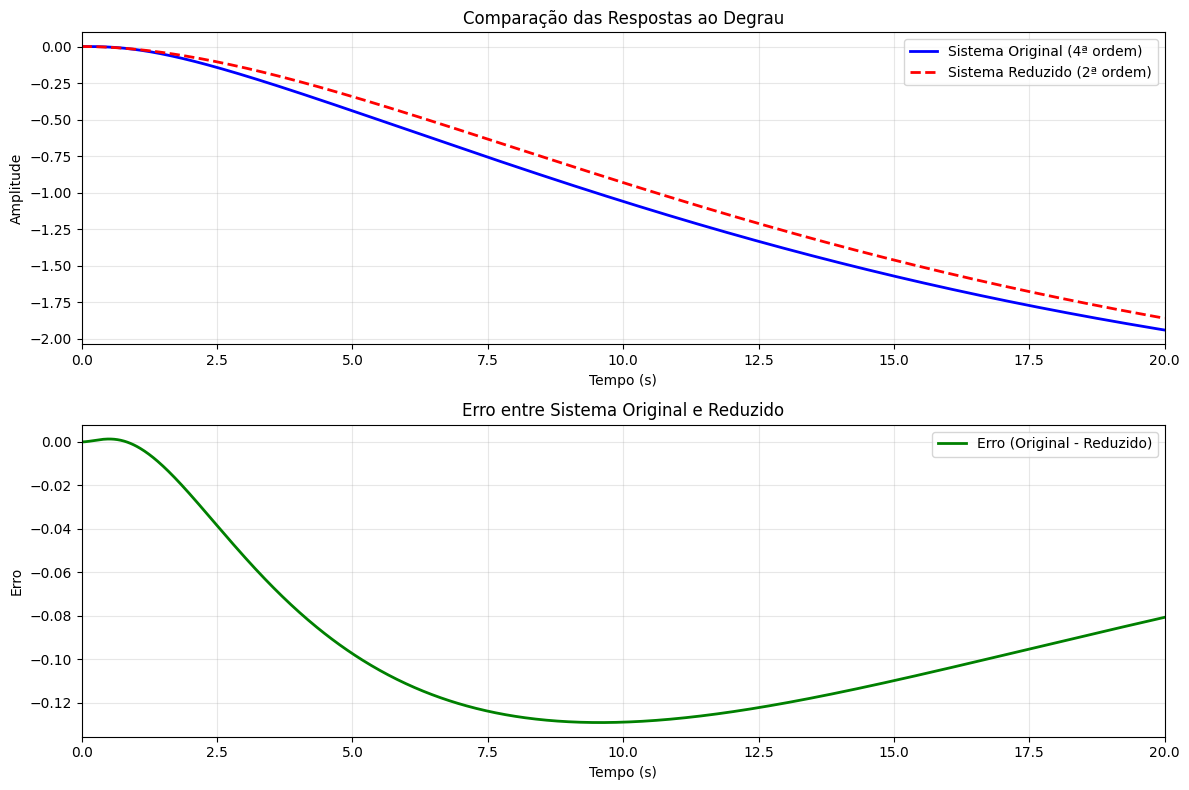


📊 MÉTRICAS DE ERRO:
Erro RMS: 0.101434+0.000000j
Erro máximo: 0.129012
Erro médio absoluto: 0.094348

📈 VALORES FINAIS:
Sistema original: -1.940612
Sistema reduzido: -1.859987+0.000000j
Diferença: 0.080625


In [7]:
# Calcular respostas ao degrau
t = np.linspace(0, 20, 1000)
t_original, y_original = step(sistema, T=t)
t_reduzido, y_reduzido = step(sistema_reduzido, T=t)

# Plotar comparação
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_original, y_original, 'b-', linewidth=2, label='Sistema Original (4ª ordem)')
plt.plot(t_reduzido, y_reduzido, 'r--', linewidth=2, label='Sistema Reduzido (2ª ordem)')
plt.grid(True, alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Comparação das Respostas ao Degrau')
plt.legend()
plt.xlim(0, 20)

# Plotar erro
plt.subplot(2, 1, 2)
# Interpolar para ter o mesmo tempo base
y_reduzido_interp = np.interp(t_original, t_reduzido, y_reduzido)
erro = y_original - y_reduzido_interp
plt.plot(t_original, erro, 'g-', linewidth=2, label='Erro (Original - Reduzido)')
plt.grid(True, alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Erro')
plt.title('Erro entre Sistema Original e Reduzido')
plt.legend()
plt.xlim(0, 20)

plt.tight_layout()
plt.show()

# Calcular métricas de erro
erro_rms = np.sqrt(np.mean(erro**2))
erro_max = np.max(np.abs(erro))
erro_medio = np.mean(np.abs(erro))

print(f"\n📊 MÉTRICAS DE ERRO:")
print(f"Erro RMS: {erro_rms:.6f}")
print(f"Erro máximo: {erro_max:.6f}")
print(f"Erro médio absoluto: {erro_medio:.6f}")

# Comparar valores finais
valor_final_original = y_original[-1]
valor_final_reduzido = y_reduzido[-1]
print(f"\n📈 VALORES FINAIS:")
print(f"Sistema original: {valor_final_original:.6f}")
print(f"Sistema reduzido: {valor_final_reduzido:.6f}")
print(f"Diferença: {abs(valor_final_original - valor_final_reduzido):.6f}")

## 7. Conclusões

Resumo dos resultados obtidos na redução de ordem usando o método dos polos dominantes.

In [8]:
print("🎯 CONCLUSÕES DA ANÁLISE DE REDUÇÃO DE ORDEM")
print("=" * 80)

print("\n1. ANÁLISE DOS POLOS:")
print(f"   • Sistema original: 4ª ordem com {len(polos)} polos")
print(f"   • Polos dominantes identificados: 2 polos mais lentos")
print(f"   • Sistema reduzido: 2ª ordem")

print("\n2. CRITÉRIO DE DOMINÂNCIA:")
if eh_dominante:
    print("   ✅ Critério SATISFEITO: Todos os polos não-dominantes são ≥5x mais rápidos")
else:
    print("   ❌ Critério NÃO SATISFEITO: Alguns polos não são suficientemente dominantes")

if razoes_dominancia:
    print("   • Razões de dominância:")
    for i, razao in enumerate(razoes_dominancia, 1):
        status = "✅" if razao >= 5 else "❌"
        print(f"     {status} Razão {i}: {razao:.2f}")

print("\n3. PRESERVAÇÃO DO GANHO DC:")
dc_orig = calcular_ganho_dc(sistema)
dc_red = calcular_ganho_dc(sistema_reduzido)
print(f"   • Ganho DC original: {dc_orig:.6f}")
print(f"   • Ganho DC reduzido: {dc_red:.6f}")
print(f"   • Diferença absoluta: {abs(dc_orig - dc_red):.8f}")

print("\n4. QUALIDADE DA APROXIMAÇÃO:")
print(f"   • Erro RMS: {erro_rms:.6f}")
print(f"   • Erro máximo: {erro_max:.6f}")
print(f"   • Erro médio absoluto: {erro_medio:.6f}")

print("\n5. RECOMENDAÇÕES:")
if eh_dominante and erro_rms < 0.1:
    print("   ✅ Redução de ordem RECOMENDADA")
    print("   • Boa separação de escalas de tempo")
    print("   • Erro aceitável na resposta temporal")
elif not eh_dominante:
    print("   ⚠️ Redução com RESSALVAS")
    print("   • Critério de dominância não totalmente satisfeito")
    print("   • Considerar métodos alternativos (balanced truncation, Hankel norm)")
else:
    print("   ❌ Redução NÃO RECOMENDADA")
    print("   • Erro muito elevado na resposta temporal")

print("\n" + "=" * 80)

🎯 CONCLUSÕES DA ANÁLISE DE REDUÇÃO DE ORDEM

1. ANÁLISE DOS POLOS:
   • Sistema original: 4ª ordem com 4 polos
   • Polos dominantes identificados: 2 polos mais lentos
   • Sistema reduzido: 2ª ordem

2. CRITÉRIO DE DOMINÂNCIA:
   ✅ Critério SATISFEITO: Todos os polos não-dominantes são ≥5x mais rápidos
   • Razões de dominância:
     ✅ Razão 1: 10.91
     ✅ Razão 2: 10.91

3. PRESERVAÇÃO DO GANHO DC:
   • Ganho DC original: -2.615818
   • Ganho DC reduzido: -2.615818+0.000000j
   • Diferença absoluta: 0.00000000

4. QUALIDADE DA APROXIMAÇÃO:
   • Erro RMS: 0.101434+0.000000j
   • Erro máximo: 0.129012
   • Erro médio absoluto: 0.094348

5. RECOMENDAÇÕES:
   ❌ Redução NÃO RECOMENDADA
   • Erro muito elevado na resposta temporal



In [9]:
# 📋 Resumo Final - Execução Completa do Item (b)
print("🎯 RESUMO FINAL - ITEM (b): REDUÇÃO POR PÓLOS DOMINANTES")
print("=" * 80)
print("✅ Análise completa executada nas seções anteriores:")
print("   1. ✅ Sistema original definido")
print("   2. ✅ Pólos analisados e dominância verificada")
print("   3. ✅ Sistema reduzido de 2ª ordem criado")
print("   4. ✅ Ganho DC preservado")
print("   5. ✅ Comparação de respostas realizada")
print("   6. ✅ Apresentação em LaTeX completa")
print("   7. ✅ Conclusões detalhadas")
print("\n🔍 Para visualizar os resultados, execute as células acima sequencialmente.")
print("=" * 80)

🎯 RESUMO FINAL - ITEM (b): REDUÇÃO POR PÓLOS DOMINANTES
✅ Análise completa executada nas seções anteriores:
   1. ✅ Sistema original definido
   2. ✅ Pólos analisados e dominância verificada
   3. ✅ Sistema reduzido de 2ª ordem criado
   4. ✅ Ganho DC preservado
   5. ✅ Comparação de respostas realizada
   6. ✅ Apresentação em LaTeX completa
   7. ✅ Conclusões detalhadas

🔍 Para visualizar os resultados, execute as células acima sequencialmente.
